### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv('drugLibTrain_raw.tsv', sep='\t', header=0, index_col=0);
df.head()


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [46]:
df.tail()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...
2748,micardis,4,Moderately Effective,Moderate Side Effects,high blood pressure,The drug Micardis did seem to alleviate my hig...,I find when I am taking Micardis that I tend t...,I take Micardis in pill form once daily.


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [48]:
df.nunique()

urlDrugName           502
rating                 10
effectiveness           5
sideEffects             5
condition            1426
benefitsReview       3031
sideEffectsReview    2813
commentsReview       3046
dtype: int64

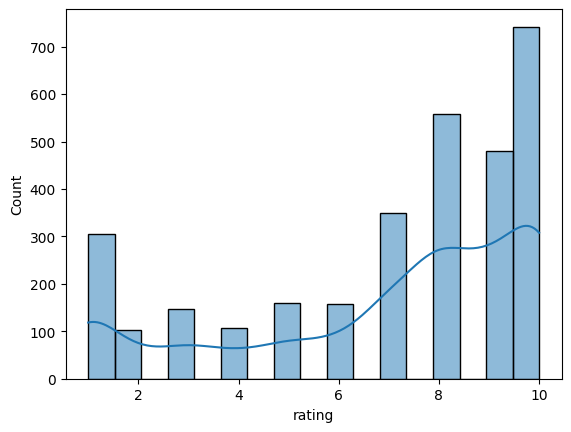

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["rating"], kde= True);

In [50]:
df.rating.value_counts()

rating
10    742
8     558
9     480
7     350
1     305
5     159
6     157
3     146
4     107
2     103
Name: count, dtype: int64

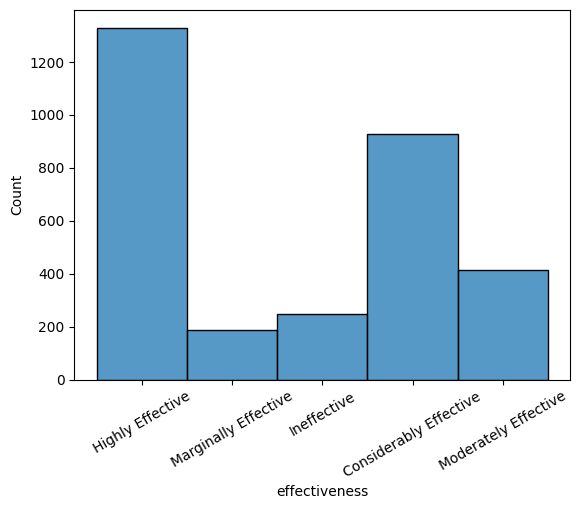

In [51]:
plt.xticks(rotation=30);
sns.histplot(df["effectiveness"]);

In [52]:
df.groupby('effectiveness').mean('rating').sort_values(by='rating', ascending=False)

,rating
effectiveness,
Highly Effective,8.793985
Considerably Effective,7.327586
Moderately Effective,5.426506
Marginally Effective,3.395722
Ineffective,1.558704


In [53]:
df.effectiveness.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [54]:
map = {
    'Highly Effective':4, 'Marginally Effective': 1, 'Ineffective': 0,
       'Considerably Effective': 3, 'Moderately Effective':2
}

df['effectiveness_int'] = df['effectiveness'].map(map)

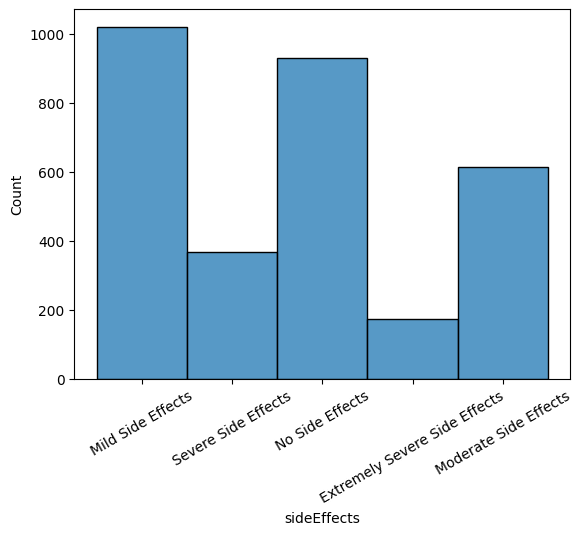

In [55]:
plt.xticks(rotation=30);
sns.histplot(df["sideEffects"]);

In [56]:
df.groupby('sideEffects').mean('rating').sort_values(by='rating', ascending=False)

,rating,effectiveness_int
sideEffects,,
No Side Effects,8.626882,3.309677
Mild Side Effects,8.158979,3.224730
Moderate Side Effects,6.229642,2.771987
Severe Side Effects,3.582656,2.135501
Extremely Severe Side Effects,1.622857,1.525714


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [57]:
effectiveness_dummies = pd.get_dummies(df['effectiveness'])
df = pd.concat([df.drop('effectiveness', axis=1), effectiveness_dummies], axis=1)

In [58]:
sideEffects_dummies = pd.get_dummies(df['sideEffects'])
df = pd.concat([df.drop('sideEffects', axis=1), sideEffects_dummies], axis=1)

In [59]:
df.head()

,urlDrugName,rating,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
2202,enalapril,4,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,False,True,False,False,False,False,True,False,False,False
3117,ortho-tri-cyclen,1,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,False,True,False,False,False,False,False,False,False,True
1146,ponstel,10,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,False,True,False,False,False,False,False,False,True,False
3947,prilosec,3,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,False,False,False,True,False,False,True,False,False,False
1951,lyrica,2,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,False,False,False,True,False,False,False,False,False,True


In [60]:
df.columns.values

array(['urlDrugName', 'rating', 'condition', 'benefitsReview',
       'sideEffectsReview', 'commentsReview', 'effectiveness_int',
       'Considerably Effective', 'Highly Effective', 'Ineffective',
       'Marginally Effective', 'Moderately Effective',
       'Extremely Severe Side Effects', 'Mild Side Effects',
       'Moderate Side Effects', 'No Side Effects', 'Severe Side Effects'],
      dtype=object)

In [61]:
df.nunique()

urlDrugName                       502
rating                             10
condition                        1426
benefitsReview                   3031
sideEffectsReview                2813
commentsReview                   3046
effectiveness_int                   5
Considerably Effective              2
Highly Effective                    2
Ineffective                         2
Marginally Effective                2
Moderately Effective                2
Extremely Severe Side Effects       2
Mild Side Effects                   2
Moderate Side Effects               2
No Side Effects                     2
Severe Side Effects                 2
dtype: int64

In [62]:
X = df[['rating', 'Considerably Effective',
       'Highly Effective', 'Ineffective', 'Marginally Effective',
       'Moderately Effective', 'Extremely Severe Side Effects',
       'Mild Side Effects', 'Moderate Side Effects', 'No Side Effects',
       'Severe Side Effects']]

In [63]:
X.shape

(3107, 11)

In [64]:
len(df['urlDrugName'])

3107

In [65]:
df.head()

,urlDrugName,rating,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
2202,enalapril,4,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,False,True,False,False,False,False,True,False,False,False
3117,ortho-tri-cyclen,1,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,False,True,False,False,False,False,False,False,False,True
1146,ponstel,10,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,False,True,False,False,False,False,False,False,True,False
3947,prilosec,3,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,False,False,False,True,False,False,True,False,False,False
1951,lyrica,2,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,False,False,False,True,False,False,False,False,False,True


In [66]:
df.condition.value_counts().sum()

np.int64(3106)

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [67]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, n_init=150, random_state=10).fit(X)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [68]:
df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
df_kmeans

,inertia,inertia_1,diff%
0,31296.468619,NaN,NaN
1,9743.174037,31296.468619,0.311319
2,6257.991747,9743.174037,0.642295
3,4828.184200,6257.991747,0.771523
4,4234.342226,4828.184200,0.877005
5,3776.306855,4234.342226,0.891828
6,3461.273313,3776.306855,0.916576
7,3138.278465,3461.273313,0.906683
8,2928.447221,3138.278465,0.933138
9,2765.090205,2928.447221,0.944217


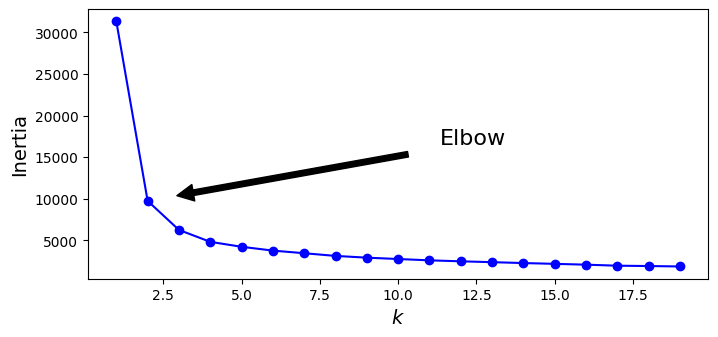

In [69]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.axis([1, 8.5, 0, 1300])
plt.show();

In [70]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

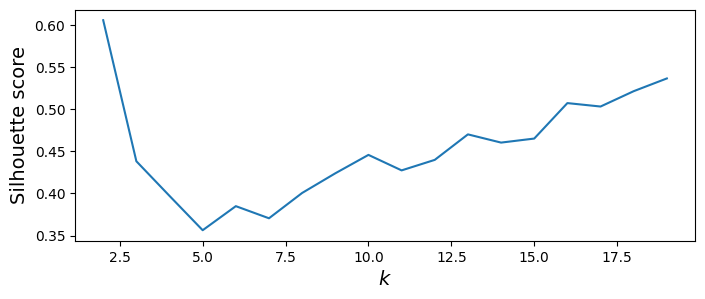

In [71]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

_k_ = 2, como de compacto están los datos alreadedor del centroide; devuelve un % mientras elbow la distancia  

[]

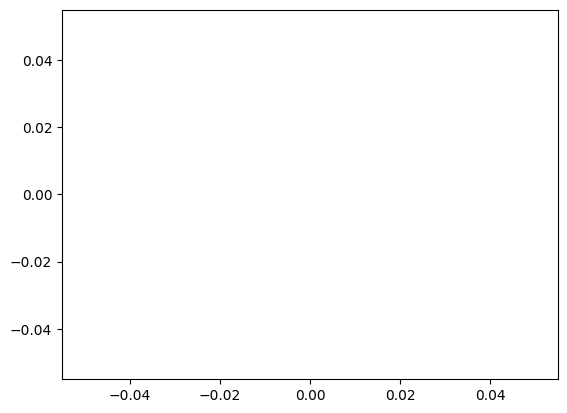

In [72]:
plt.plot()

#### Genera el K Means 

In [77]:
kmeans2 = KMeans(n_clusters=2, n_init=150, random_state=10).fit(X)

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [78]:
kmeans2.labels_

array([0, 0, 1, ..., 0, 1, 0], shape=(3107,), dtype=int32)

In [79]:
unique, frequency = np.unique(kmeans2.labels_, 
                              return_counts = True)

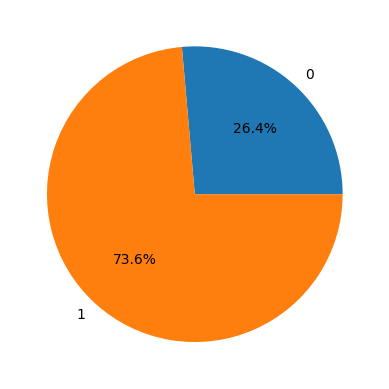

In [80]:
plt.pie(frequency, labels=unique, autopct='%1.1f%%')
plt.show()

In [41]:
df_kmeans2 = pd.DataFrame(kmeans2.labels_, columns='data')
df_kmeans2.head()

TypeError: Index(...) must be called with a collection of some kind, 'data' was passed